In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/User/Downloads/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Dive Into Data

In [4]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# statistical summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
# summary of categorical column
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


# Data Cleaning

In [7]:
# details about categorical columns
print(df['gender'].value_counts())
print("\033[1mNOTE: The 'gender' column has an inauthentic value labeled as 'Other' occurring 18 times.\033[0m")

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
NOTE: The 'gender' column has an inauthentic value labeled as 'Other' occurring 18 times.


In [8]:
# removing 'Other' from ['gender'] column
df.drop(df[df['gender']=='Other'].index,inplace=True)
df['gender'].value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

In [9]:
# check for duplicate records
print(df.shape)
print(df.duplicated().sum())

(99982, 9)
3854


In [10]:
# removing duplicate records
df.drop(df[df.duplicated()].index,inplace=True)
print("After remove duplicate records:")
print(df.shape)

After remove duplicate records:
(96128, 9)


# EDA

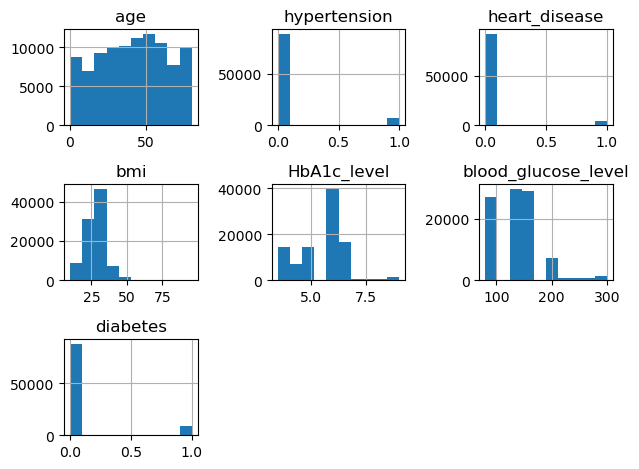

In [11]:
df.hist()
plt.tight_layout()

**Gender Based Analysis**

[]

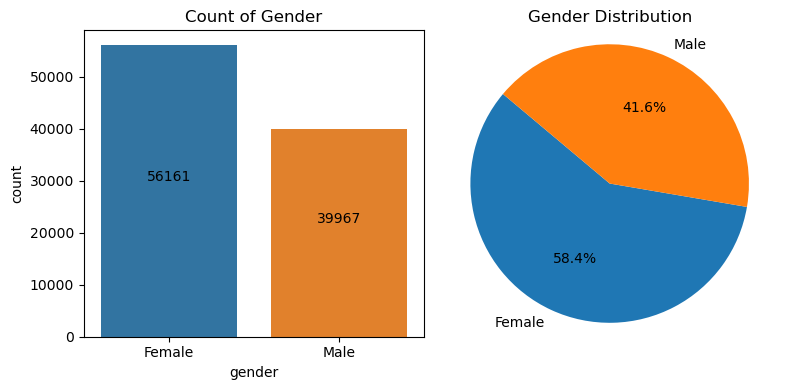

In [12]:
# Calculate the count of each gender category
gender_counts = df['gender'].value_counts(normalize=True) * 100
# Create a figure with subplots
fig , ax = plt.subplots(1,2,figsize=(8,4))
# Plotting using Seaborn countplot in the first subplot
sns.countplot(data=df,x="gender",ax=ax[0])
ax[0].set_title("Count of Gender")
# Plotting the pie chart in the second subplot 
ax[1].pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=140)
ax[1].set_title('Gender Distribution')
ax[1].axis('equal')
# Annotating count values on top of each bar in the count plot
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.plot()

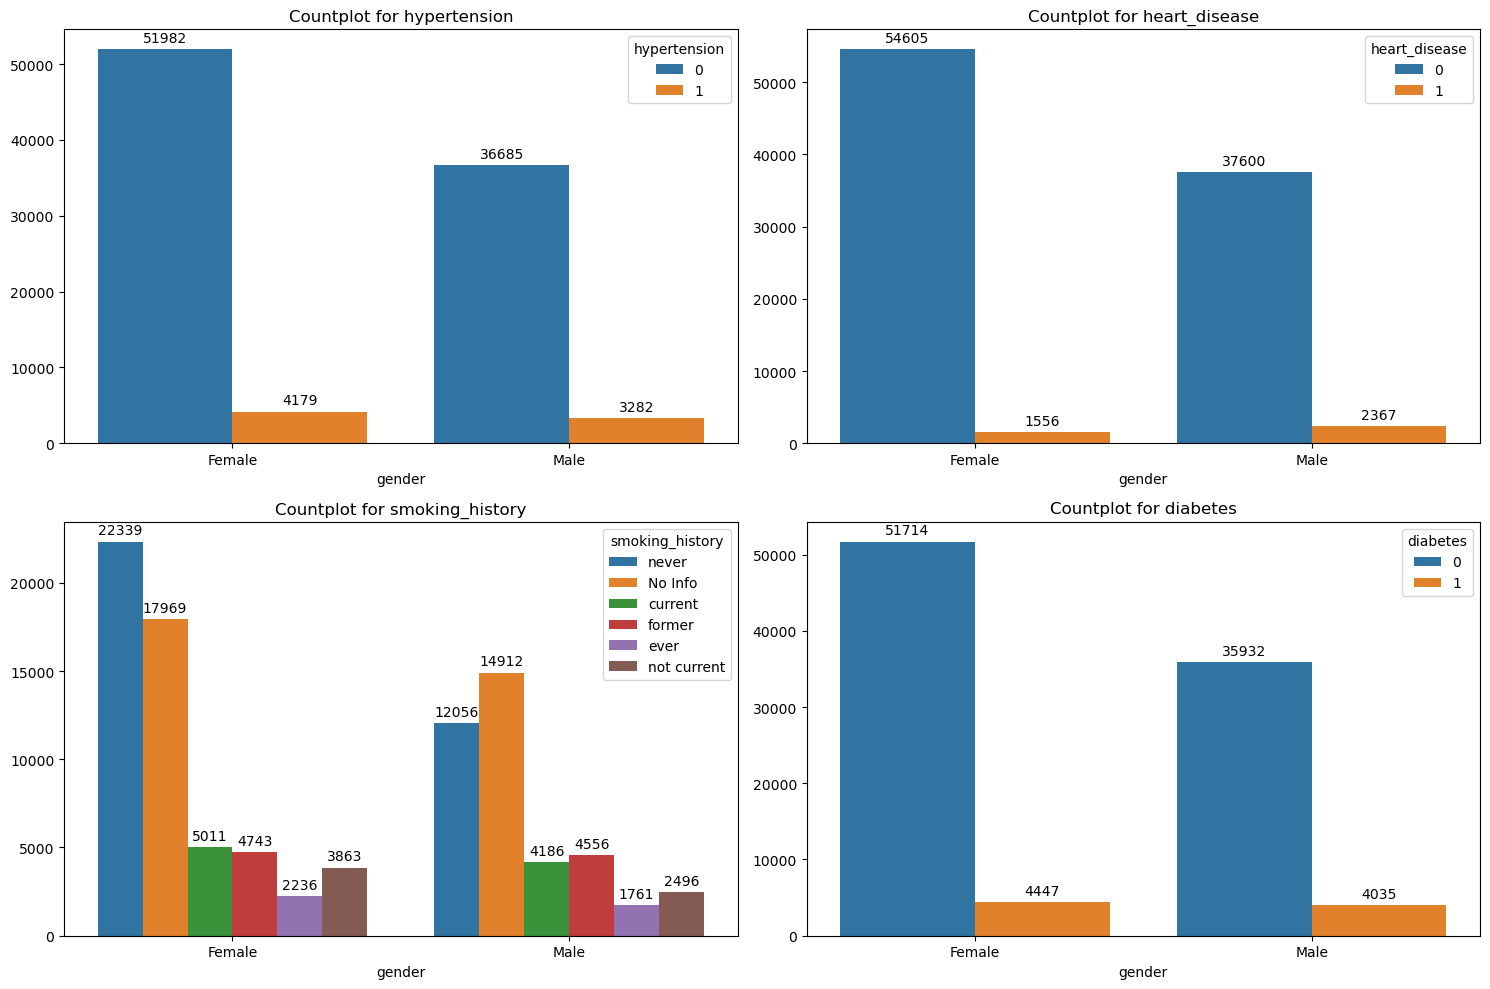

In [13]:
# features for gender based analysis
legend = ['hypertension', 'heart_disease', 'smoking_history','diabetes']
# plotting countplots
fig,ax = plt.subplots(2,2,figsize=(15,10))
for i in range(len(legend)):
    rows = i//2
    cols = i%2
    sns.countplot(data=df,x='gender',hue=legend[i],ax=ax[rows,cols])
    # Annotating count values on top of each bar in the count plot
    for p in ax[rows,cols].patches:
        ax[rows,cols].annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()),
                      ha='center',va='center',
                      xytext = (0,8),
                      textcoords = 'offset points')
    # setting title for each plot
    ax[rows,cols].set_title(f'Countplot for {legend[i]}')
    ax[rows,cols].set_ylabel("")
plt.tight_layout()
plt.show()